<a href="https://colab.research.google.com/github/AtSourav/AE-cats-n-dogs/blob/main/AE_cats_n_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras       # cannot use the name tf to import modules, can only use it to call functions or modules
from keras import losses
from keras import layers
from keras import utils
from keras import backend as K

import os
import matplotlib.pyplot as plt


In [2]:
input_size = (64,64,3)
latent_dim = 512
batch_size = 128

In [3]:
! git clone https://github.com/AtSourav/CatsnDogs_img_dataset.git           # ! let's us use shell commands

Cloning into 'CatsnDogs_img_dataset'...
remote: Enumerating objects: 10444, done.
remote: Counting objects: 100% (4705/4705), done.
remote: Compressing objects: 100% (4704/4704), done.
remote: Total 10444 (delta 3), reused 4697 (delta 1), pack-reused 5739
Receiving objects: 100% (10444/10444), 68.94 MiB | 4.34 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
!ls CatsnDogs_img_dataset/Dataset_aug | sed -n 36p     # -n sed asks not to print every line, 20p specifies that we want it to print the 36th entry

Cat_1032.jpg


In [4]:
img_dir = 'CatsnDogs_img_dataset/Dataset_aug/'
dir_size = len([imgs for imgs in os.listdir(img_dir)])

# we'll try to create one training dataset as one batch, and similarly for the validation dataset. These are dataset objects.
# We'll split the data into smaller batches while training with the fit() function.
# the images in the folder are 160 x 160 in size

data_train = utils.image_dataset_from_directory(img_dir, labels=None, validation_split=0.15, subset="training", seed=111, image_size=(160,160), color_mode='rgb', shuffle=True, batch_size=int(0.85*dir_size))

data_valid = utils.image_dataset_from_directory(img_dir, labels=None, validation_split=0.15, subset="validation", seed=111, image_size=(160,160), color_mode='rgb', shuffle=True, batch_size=int(0.15*dir_size))

for image_batch in data_train:
  print(image_batch.shape)
  break

for image_batch in data_valid:
  print(image_batch.shape)
  break


Found 5110 files belonging to 1 classes.
Using 4344 files for training.
Found 5110 files belonging to 1 classes.
Using 766 files for validation.
(4343, 160, 160, 3)
(766, 160, 160, 3)


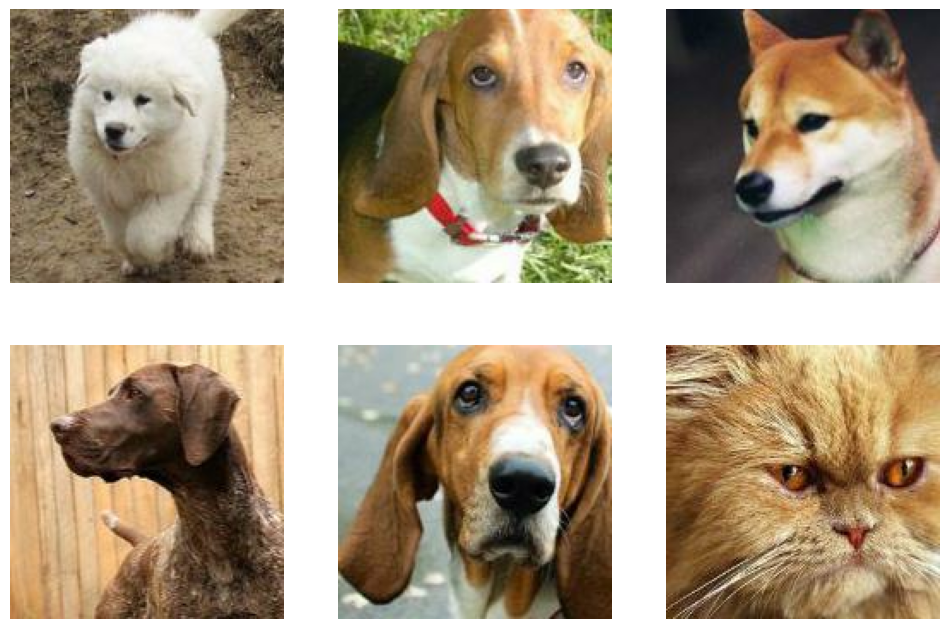

In [ ]:
visual = plt.figure(figsize=(12,8))

for image in data_train.take(1):            # Dataset.take(n) creates a TakeDataset using n items from the original dataset
  for i in range(6):
    visual.add_subplot(2,3,i+1)
    plt.imshow(image[i]/255)                # the pizel values are between 0 and 255 which we are rescaling to be between 0 and 1
    plt.axis('off')

In [5]:
train_set = next(iter(data_train))
train_set = layers.Resizing(64, 64, interpolation="bilinear")(train_set)
train_set = train_set/255.            # to ensure pixel values between [0,1], it's better for neural networks to work on small numbers
print(train_set.shape)

valid_set = next(iter(data_valid))
valid_set = layers.Resizing(64, 64, interpolation="bilinear")(valid_set)
valid_set = valid_set/255.
print(valid_set.shape)

(4343, 64, 64, 3)
(766, 64, 64, 3)


In [6]:
encoder_input = keras.Input(shape=input_size)

x = layers.Conv2D(8, 2, padding="same")(encoder_input)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)    # with strides=None this defaults to pool_size
x = layers.BatchNormalization(axis=-1)(x) # the default data_format in the conv2d is "channels last", we want to normalize across the channels, hence we set axis=-1
x = layers.ReLU()(x)

x = layers.Conv2D(16, 2, padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(32, 2, padding="same")(x)
x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(64, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(128, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(256, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

#x = layers.Conv2D(256, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
#x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(512, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(1024, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

x = layers.Conv2D(1024, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
x = layers.ReLU()(x)

#x = layers.Conv2D(512, 2, padding="valid")(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization(axis=-1)(x)
#x = layers.ReLU()(x)

x = layers.Flatten()(x)

x = layers.Dense(2*latent_dim)(x)
x = layers.ReLU()(x)

#x = layers.Dense(latent_dim)(x)
#x = layers.ReLU()(x)


z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

def sampling(arg):
  z_m, z_log_v = arg
  batch = tf.shape(z_m)[0]
  dim = tf.shape(z_m)[1]
  eps = tf.random.normal(shape=(batch,dim))
  return z_m + tf.exp(0.5*z_log_v)*eps

z = layers.Lambda(sampling)([z_mean,z_log_var])   # we feed the sampling function in to a Lambda layer to build form a layer for the architecture as keras needs

encoder = keras.Model(encoder_input, [z_mean, z_log_var, z], name='encoder')           # the second argument specifies that the encoder outputs [z_mean, z_log_var, z] for each input.
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 8)            104       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 8)            0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 batch_normalization (Batch  (None, 32, 32, 8)            32        ['max_pooling2d[0][0]'] 

In [7]:
latent_input = keras.Input(shape=(latent_dim,))

#x = layers.Dense(1*1*256)(latent_input)
#x = layers.ReLU()(x)

#x = layers.Dense(1*1*512)(latent_input)
#x = layers.ReLU()(x)

x = layers.Dense(1*1*1024)(latent_input)
x = layers.ReLU()(x)
x = layers.Reshape((1,1,1024))(x)

#x = layers.Dense(1*1*512)(latent_input)
#x = layers.ReLU()(x)
#x = layers.Reshape((1,1,512))(x)

#x = layers.Conv2DTranspose(1024, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
#x = layers.ReLU()(x)

x = layers.Conv2DTranspose(1024, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(1024, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(512, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(256, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(128, 2, strides=2, padding='same')(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(64, 2, strides=1, padding='same')(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(32, 2, strides=1, padding='same')(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(16, 2, strides=1, padding='same')(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
#x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

x = layers.Conv2DTranspose(8, 2, strides=1, padding='same')(x)
#x = layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)

decoder_output = layers.Conv2DTranspose(3, 2, activation='sigmoid', strides=1, padding='same')(x)

decoder = keras.Model(latent_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_11 (ReLU)             (None, 1024)              0         
                                                                 
 reshape (Reshape)           (None, 1, 1, 1024)        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 2, 2, 1024)        4195328   
 anspose)                                                        
                                                                 
 re_lu_12 (ReLU)             (None, 2, 2, 1024)        0         
                                                           

Now let's instantiate the VAE by combininb the encoder and the decoder layers.

In [8]:
decoder_out = decoder(encoder(encoder_input)[2])
VAE = keras.Model(encoder_input, decoder_out, name='VAE')

VAE.summary()

Model: "VAE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 encoder (Functional)        [(None, 512),             10141816  
                              (None, 512),                       
                              (None, 512)]                       
                                                                 
 decoder (Functional)        (None, 64, 64, 3)         12762235  
                                                                 
Total params: 22904051 (87.37 MB)
Trainable params: 22904019 (87.37 MB)
Non-trainable params: 32 (128.00 Byte)
_________________________________________________________________


In [53]:
K.clear_session()

In [9]:
optim = keras.optimizers.Adam(learning_rate = 0.001)
VAE.compile(optimizer=optim,loss='mse')

In [10]:
history = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=50, steps_per_epoch=None)


Epoch 1/50
34/34 [==============================] - 43s 536ms/step - loss: 0.0689 - val_loss: 0.0699
Epoch 2/50
34/34 [==============================] - 9s 261ms/step - loss: 0.0621 - val_loss: 0.0700
Epoch 3/50
34/34 [==============================] - 9s 262ms/step - loss: 0.0532 - val_loss: 0.0685
Epoch 4/50
34/34 [==============================] - 9s 262ms/step - loss: 0.0445 - val_loss: 0.0670
Epoch 5/50
34/34 [==============================] - 9s 263ms/step - loss: 0.0406 - val_loss: 0.0646
Epoch 6/50
34/34 [==============================] - 9s 263ms/step - loss: 0.0390 - val_loss: 0.0629
Epoch 7/50
34/34 [==============================] - 10s 281ms/step - loss: 0.0385 - val_loss: 0.0600
Epoch 8/50
34/34 [==============================] - 9s 279ms/step - loss: 0.0381 - val_loss: 0.0578
Epoch 9/50
34/34 [==============================] - 9s 279ms/step - loss: 0.0372 - val_loss: 0.0550
Epoch 10/50
34/34 [==============================] - 9s 279ms/step - loss: 0.0363 - val_loss: 0.04

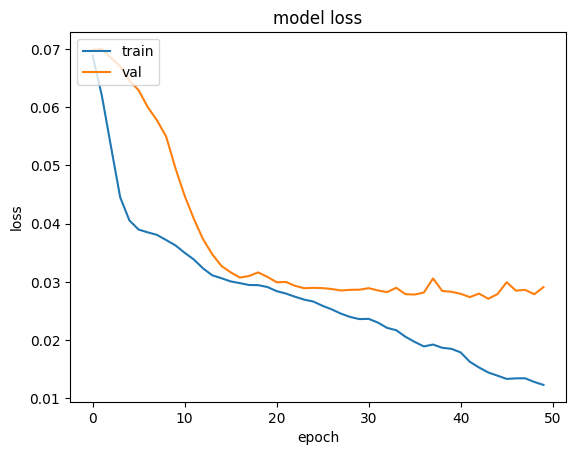

In [11]:
plt.plot(history.history['loss'])         # history.history is a dict with performance metrics as keys
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
optim = keras.optimizers.Adam(learning_rate = 0.00085)
VAE.compile(optimizer=optim,loss='mse')
history2 = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=50, steps_per_epoch=None)

Epoch 1/50
34/34 [==============================] - 20s 276ms/step - loss: 0.0135 - val_loss: 0.0294
Epoch 2/50
34/34 [==============================] - 10s 283ms/step - loss: 0.0105 - val_loss: 0.0275
Epoch 3/50
34/34 [==============================] - 9s 268ms/step - loss: 0.0095 - val_loss: 0.0269
Epoch 4/50
34/34 [==============================] - 10s 285ms/step - loss: 0.0093 - val_loss: 0.0268
Epoch 5/50
34/34 [==============================] - 9s 263ms/step - loss: 0.0093 - val_loss: 0.0274
Epoch 6/50
34/34 [==============================] - 10s 281ms/step - loss: 0.0096 - val_loss: 0.0280
Epoch 7/50
34/34 [==============================] - 9s 259ms/step - loss: 0.0096 - val_loss: 0.0270
Epoch 8/50
34/34 [==============================] - 9s 261ms/step - loss: 0.0090 - val_loss: 0.0267
Epoch 9/50
34/34 [==============================] - 9s 261ms/step - loss: 0.0085 - val_loss: 0.0271
Epoch 10/50
34/34 [==============================] - 9s 262ms/step - loss: 0.0085 - val_loss: 0.

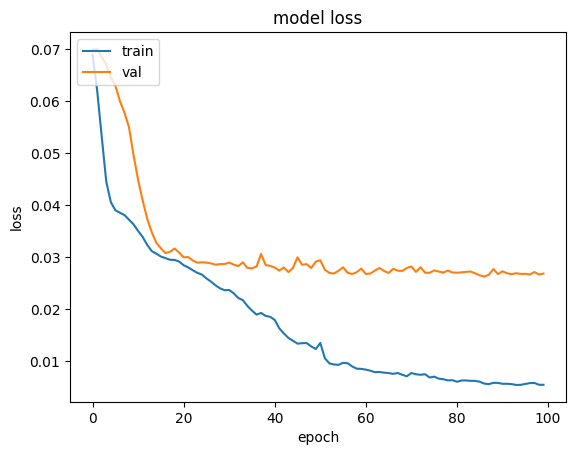

In [13]:
plt.plot(history.history['loss']+history2.history['loss'])         # history.history is a dict with performance metrics as keys
plt.plot(history.history['val_loss']+history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
optim = keras.optimizers.Adam(learning_rate = 0.0003)
VAE.compile(optimizer=optim,loss='mse')
history3 = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=30, steps_per_epoch=None)

Epoch 1/30
34/34 [==============================] - 19s 285ms/step - loss: 0.0049 - val_loss: 0.0263
Epoch 2/30
34/34 [==============================] - 9s 268ms/step - loss: 0.0045 - val_loss: 0.0263
Epoch 3/30
34/34 [==============================] - 9s 267ms/step - loss: 0.0043 - val_loss: 0.0264
Epoch 4/30
34/34 [==============================] - 9s 263ms/step - loss: 0.0042 - val_loss: 0.0270
Epoch 5/30
34/34 [==============================] - 9s 261ms/step - loss: 0.0042 - val_loss: 0.0265
Epoch 6/30
34/34 [==============================] - 9s 258ms/step - loss: 0.0042 - val_loss: 0.0264
Epoch 7/30
34/34 [==============================] - 9s 277ms/step - loss: 0.0042 - val_loss: 0.0266
Epoch 8/30
34/34 [==============================] - 9s 260ms/step - loss: 0.0041 - val_loss: 0.0265
Epoch 9/30
34/34 [==============================] - 9s 260ms/step - loss: 0.0041 - val_loss: 0.0265
Epoch 10/30
34/34 [==============================] - 9s 262ms/step - loss: 0.0041 - val_loss: 0.026

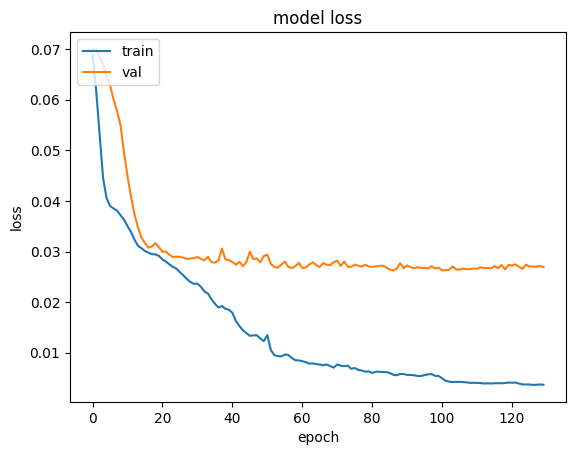

In [17]:
plt.plot(history.history['loss']+history2.history['loss']+history3.history['loss'])         # history.history is a dict with performance metrics as keys
plt.plot(history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
optim = keras.optimizers.Adam(learning_rate = 0.00009)
VAE.compile(optimizer=optim,loss='mse')
history4 = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=30, steps_per_epoch=None)

Epoch 1/30
34/34 [==============================] - 18s 276ms/step - loss: 0.0036 - val_loss: 0.0269
Epoch 2/30
34/34 [==============================] - 9s 266ms/step - loss: 0.0035 - val_loss: 0.0269
Epoch 3/30
34/34 [==============================] - 9s 267ms/step - loss: 0.0034 - val_loss: 0.0269
Epoch 4/30
34/34 [==============================] - 9s 264ms/step - loss: 0.0034 - val_loss: 0.0270
Epoch 5/30
34/34 [==============================] - 9s 262ms/step - loss: 0.0033 - val_loss: 0.0270
Epoch 6/30
34/34 [==============================] - 9s 260ms/step - loss: 0.0034 - val_loss: 0.0268
Epoch 7/30
34/34 [==============================] - 9s 277ms/step - loss: 0.0034 - val_loss: 0.0270
Epoch 8/30
34/34 [==============================] - 9s 259ms/step - loss: 0.0034 - val_loss: 0.0270
Epoch 9/30
34/34 [==============================] - 9s 259ms/step - loss: 0.0033 - val_loss: 0.0270
Epoch 10/30
34/34 [==============================] - 9s 261ms/step - loss: 0.0033 - val_loss: 0.027

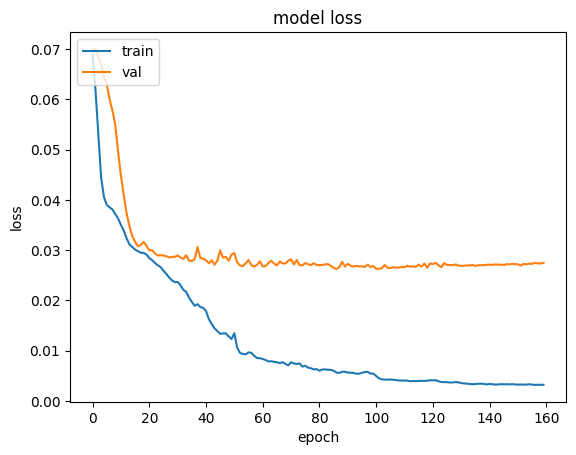

In [20]:
plt.plot(history.history['loss']+history2.history['loss']+history3.history['loss']+history4.history['loss'])         # history.history is a dict with performance metrics as keys
plt.plot(history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']+history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [22]:
optim=keras.optimizers.Adam(learning_rate = 0.00004)
VAE.compile(optimizer=optim,loss='mse')
history5 = VAE.fit(train_set, train_set, batch_size=batch_size, validation_data=(valid_set, valid_set), epochs=30, steps_per_epoch=None)

Epoch 1/30
34/34 [==============================] - 20s 309ms/step - loss: 0.0032 - val_loss: 0.0273
Epoch 2/30
34/34 [==============================] - 10s 285ms/step - loss: 0.0031 - val_loss: 0.0274
Epoch 3/30
34/34 [==============================] - 10s 289ms/step - loss: 0.0031 - val_loss: 0.0273
Epoch 4/30
34/34 [==============================] - 9s 264ms/step - loss: 0.0032 - val_loss: 0.0273
Epoch 5/30
34/34 [==============================] - 9s 262ms/step - loss: 0.0031 - val_loss: 0.0275
Epoch 6/30
34/34 [==============================] - 9s 261ms/step - loss: 0.0031 - val_loss: 0.0273
Epoch 7/30
34/34 [==============================] - 9s 260ms/step - loss: 0.0032 - val_loss: 0.0273
Epoch 8/30
34/34 [==============================] - 9s 279ms/step - loss: 0.0032 - val_loss: 0.0274
Epoch 9/30
34/34 [==============================] - 9s 264ms/step - loss: 0.0031 - val_loss: 0.0275
Epoch 10/30
34/34 [==============================] - 9s 261ms/step - loss: 0.0031 - val_loss: 0.0

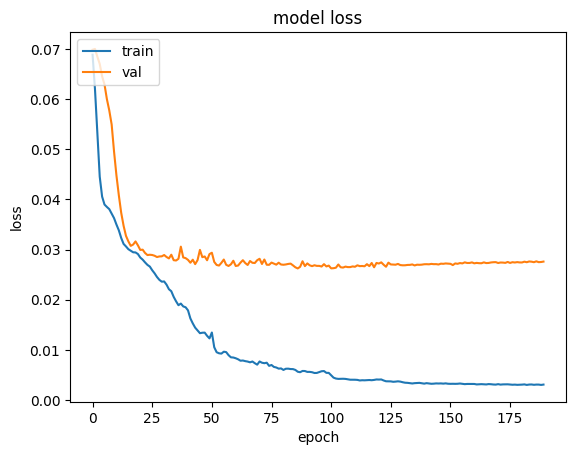

In [23]:
plt.plot(history.history['loss']+history2.history['loss']+history3.history['loss']+history4.history['loss']+history5.history['loss'])         # history.history is a dict with performance metrics as keys
plt.plot(history.history['val_loss']+history2.history['val_loss']+history3.history['val_loss']+history4.history['val_loss']+history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [14]:
def plot_reconstruction(set, name,seed_val, epochs):     #name should be either 'training' or 'validation'
  np.random.seed(seed_val)

  tg_indices = np.random.randint(0,set.shape[0],size = 16)
  img_sample = tf.convert_to_tensor(np.array(set)[tg_indices])
  _,_,z_sample = encoder(img_sample)
  img_recon = decoder(z_sample)

  recon = plt.figure(figsize=(18,8))    # we leave one column of difference between the 10x10 grid of training images and 10x10 of validation images
                                        # it's weird that the order of axes in figsize is the opposite to that in add_subplot
  recon.suptitle('Reconstructed images (right) from the ' + name + '-set after ' + str(epochs) + ' epochs: no regularisation in the encoder, decoder, beta=1, latent_dim = 32', fontweight= 'bold', y=0.93)

  recon.tight_layout()

  for i in range(36):
    recon.add_subplot(4,9,i+1)
    j = int(np.floor(i/9))
    if (i%9) <4:
      img = set[tg_indices[j*4 + (i%9)]]
      plt.imshow(img)
      plt.axis('off')
    elif (i%9)==4:
      img = np.ones((64,64,3))
      plt.imshow(img)
      plt.axis('off')
    else:
      img = img_recon[j*4 + (i%9) - 5]
      plt.imshow(img)
      plt.axis('off')

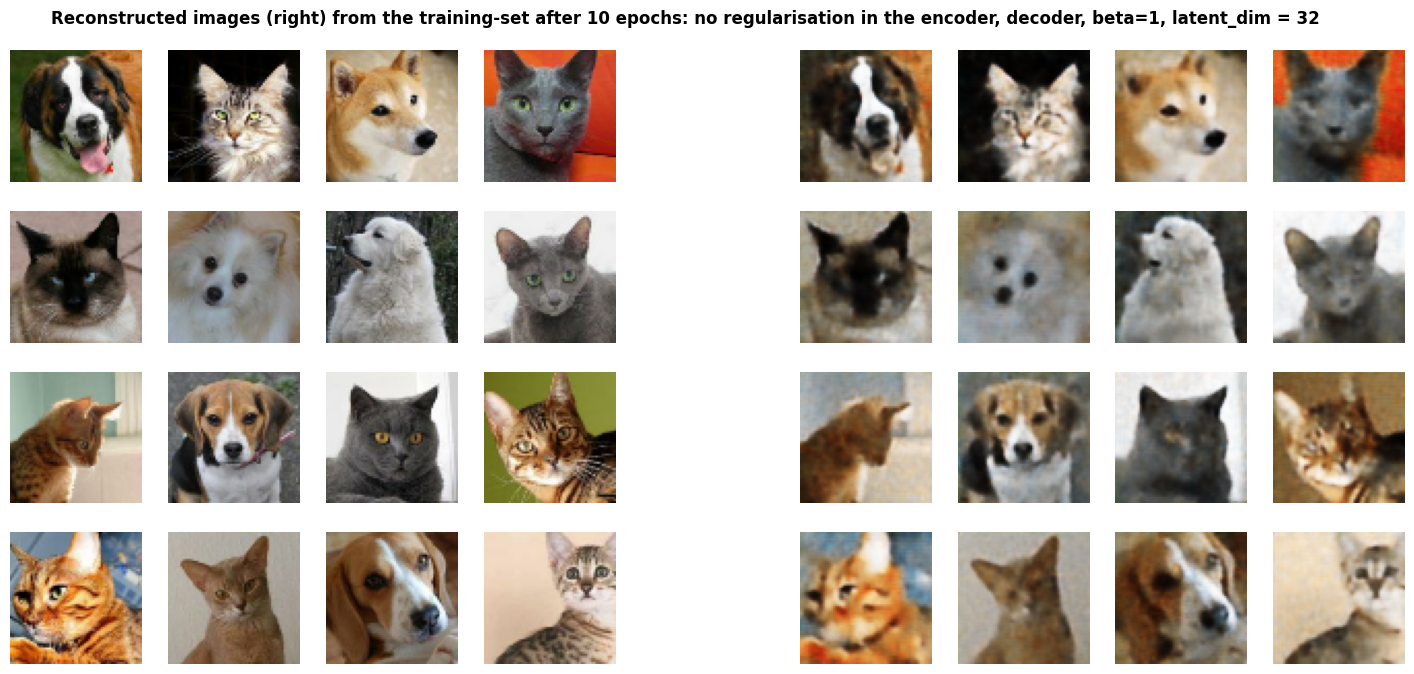

In [24]:
plot_reconstruction(train_set,'training',333,10)

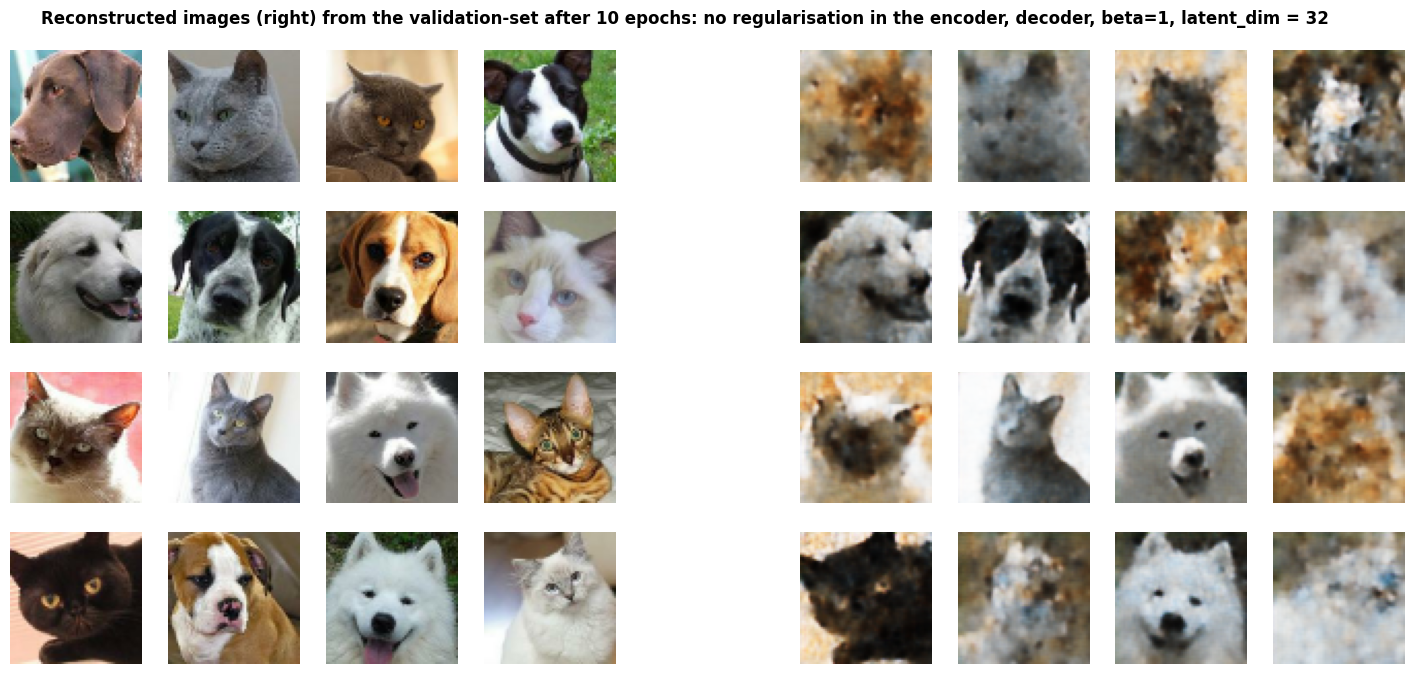

In [25]:
plot_reconstruction(valid_set,'validation',123,10)